In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds


In [2]:
print(tf.__version__)


2.15.0


In [3]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar = True)
data_dir=pathlib.Path(data_dir)

In [4]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count


3670

In [5]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x7a46d5b6d850>

In [6]:
list(data_dir.glob('*/*.jpg'))[0:2]

[PosixPath('/root/.keras/datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/483444865_65962cea07_m.jpg')]

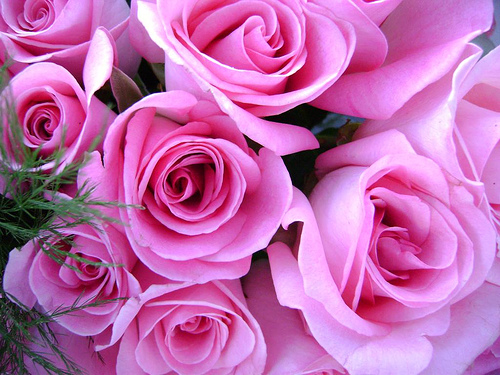

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

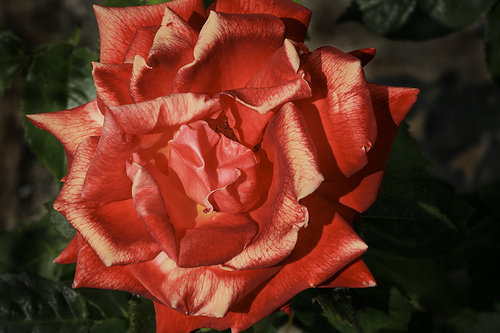

In [8]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[10]))

In [9]:
#Load data using keras utility
batch_size = 32
img_height=180
img_width=180

In [13]:
#train --> 80%
#validation --> 20%


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)



Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
#Class names

class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
